In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True,palette="viridis")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import scipy.stats as stats

In [8]:
df = pd.read_csv(r"C:\Users\Tshepo\Desktop\MLAgortihms\Datasets\churn_data.csv")
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,Yes


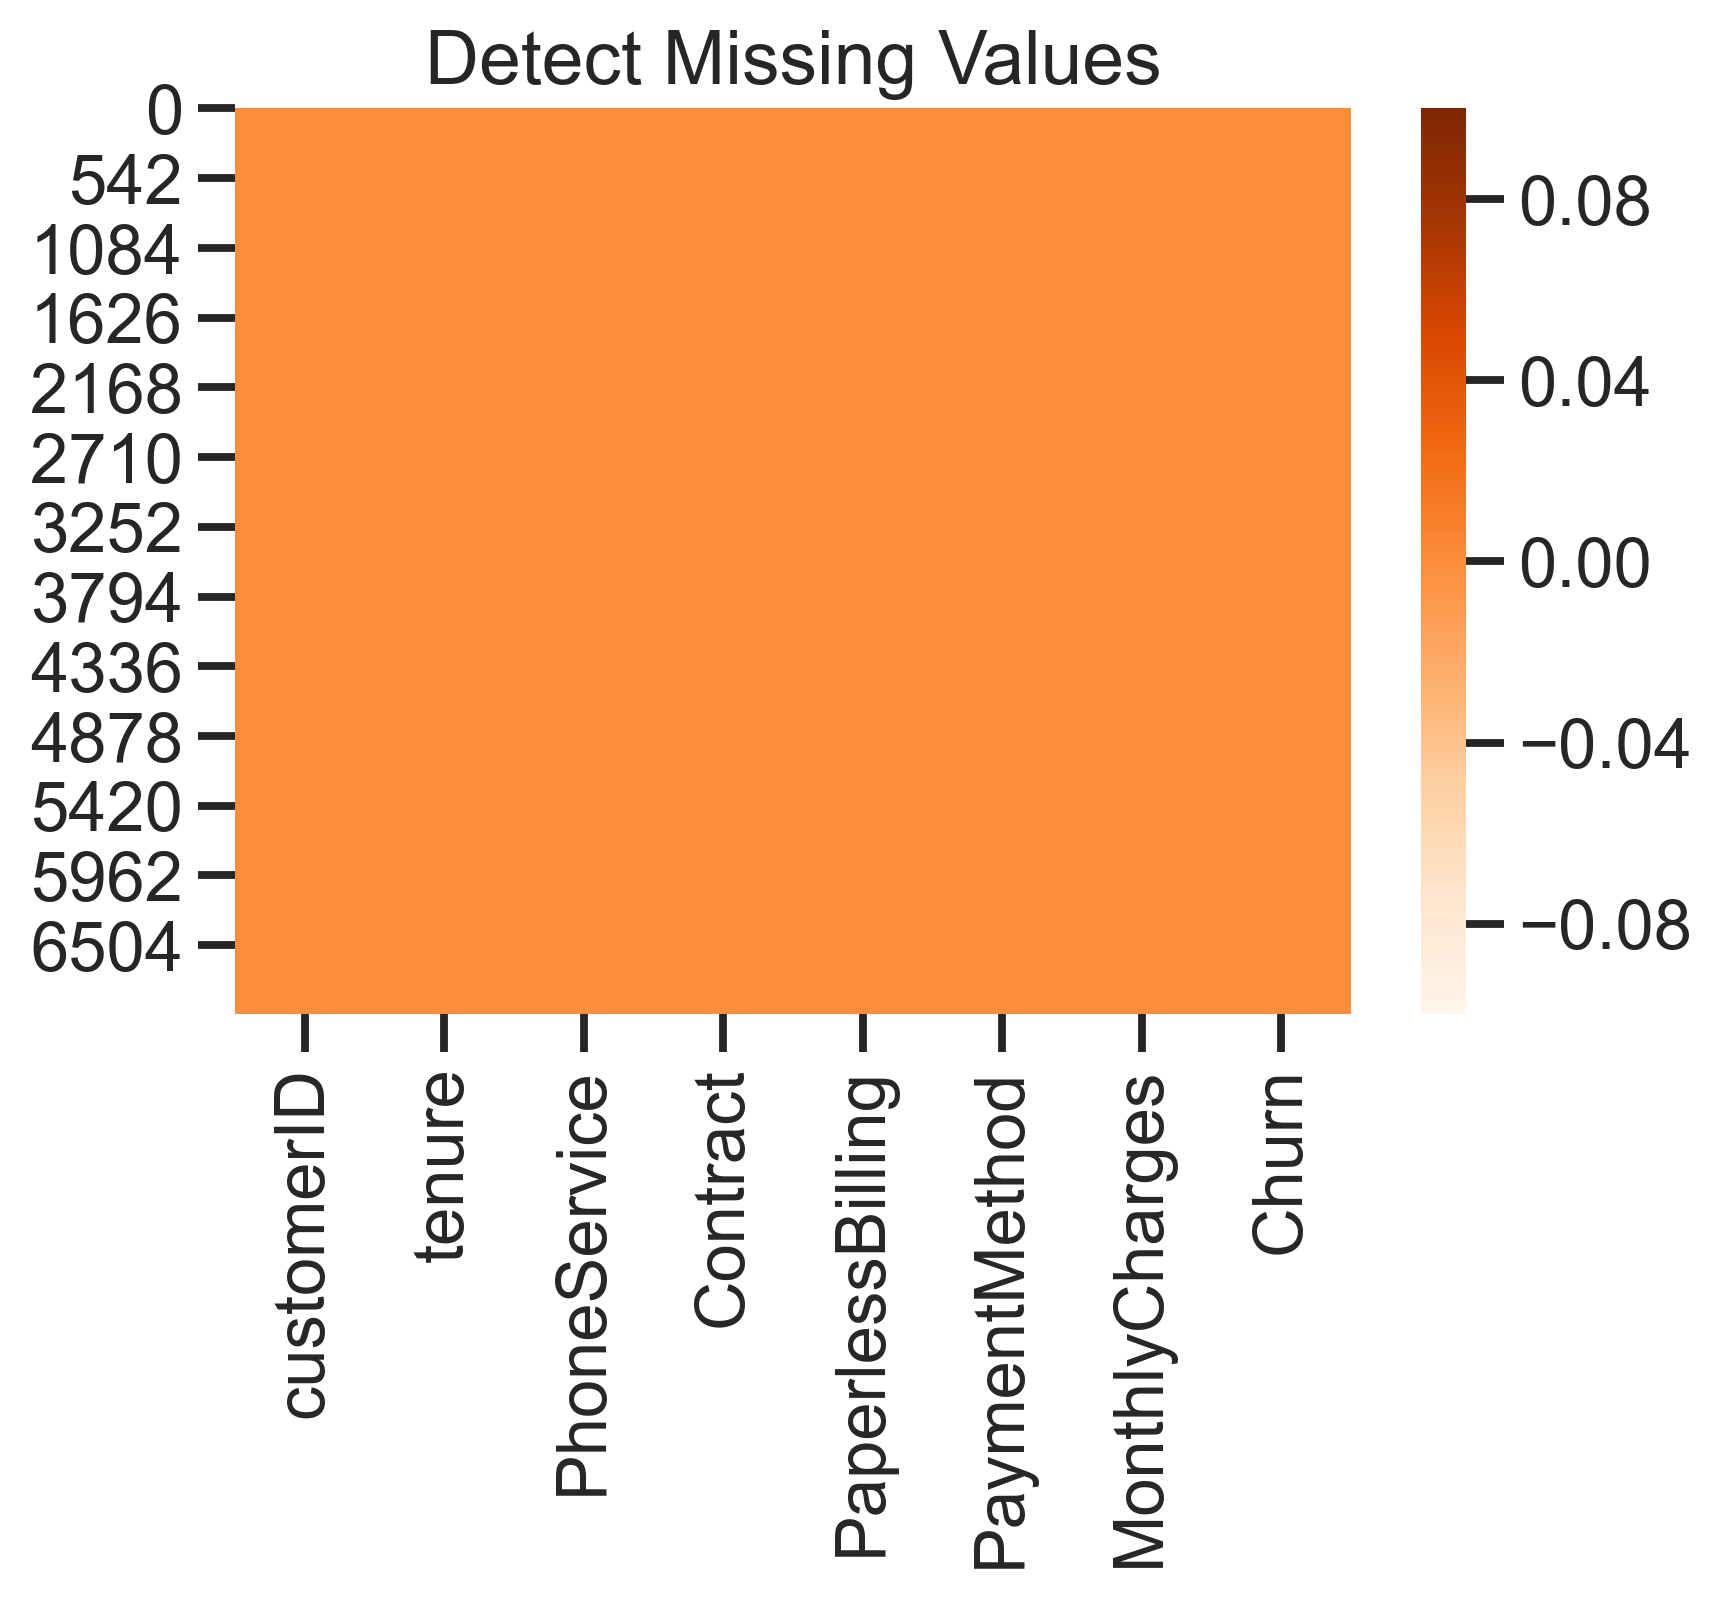

In [9]:
sns.heatmap(df.isnull(),cmap="Oranges")
plt.title("Detect Missing Values")
plt.show()

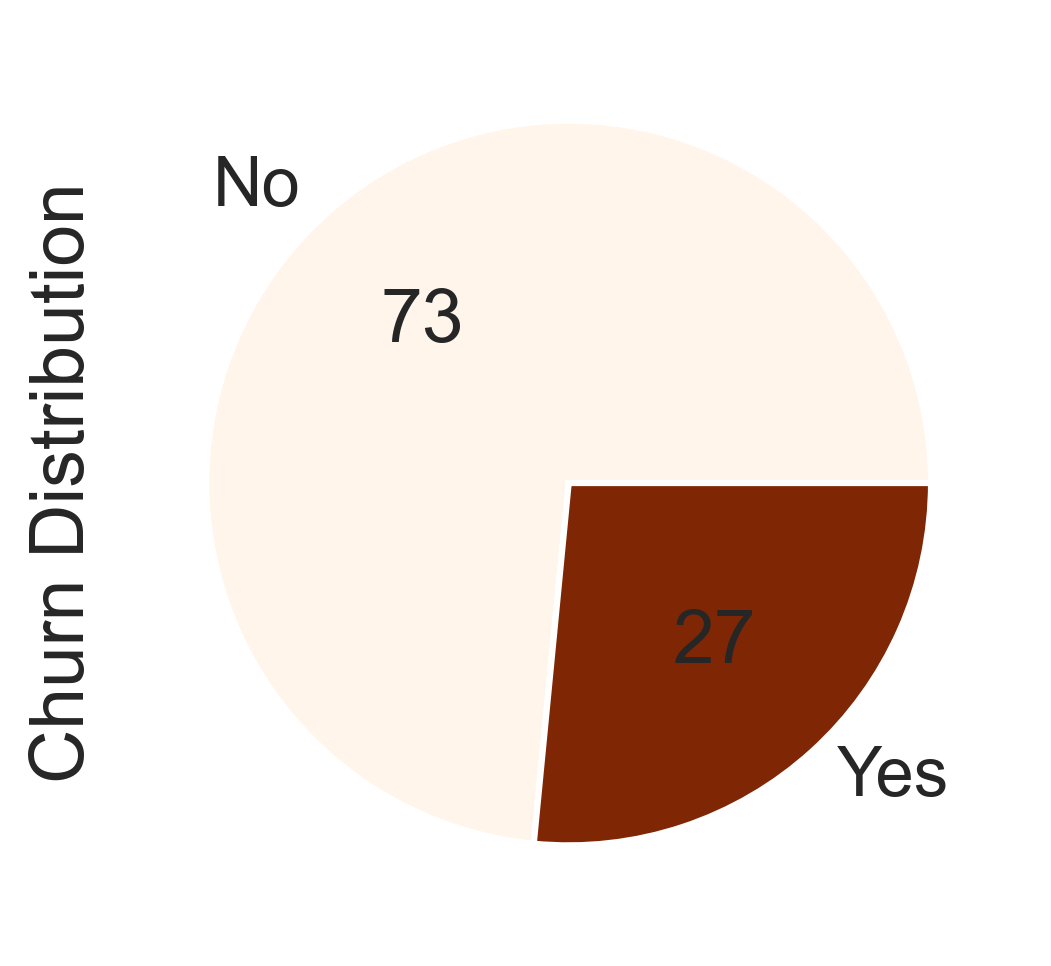

In [10]:
class_series = df.groupby("Churn").size()
class_series.name = "Churn Distribution"
class_series.plot.pie(autopct="%2.f",cmap="Oranges")
plt.show()

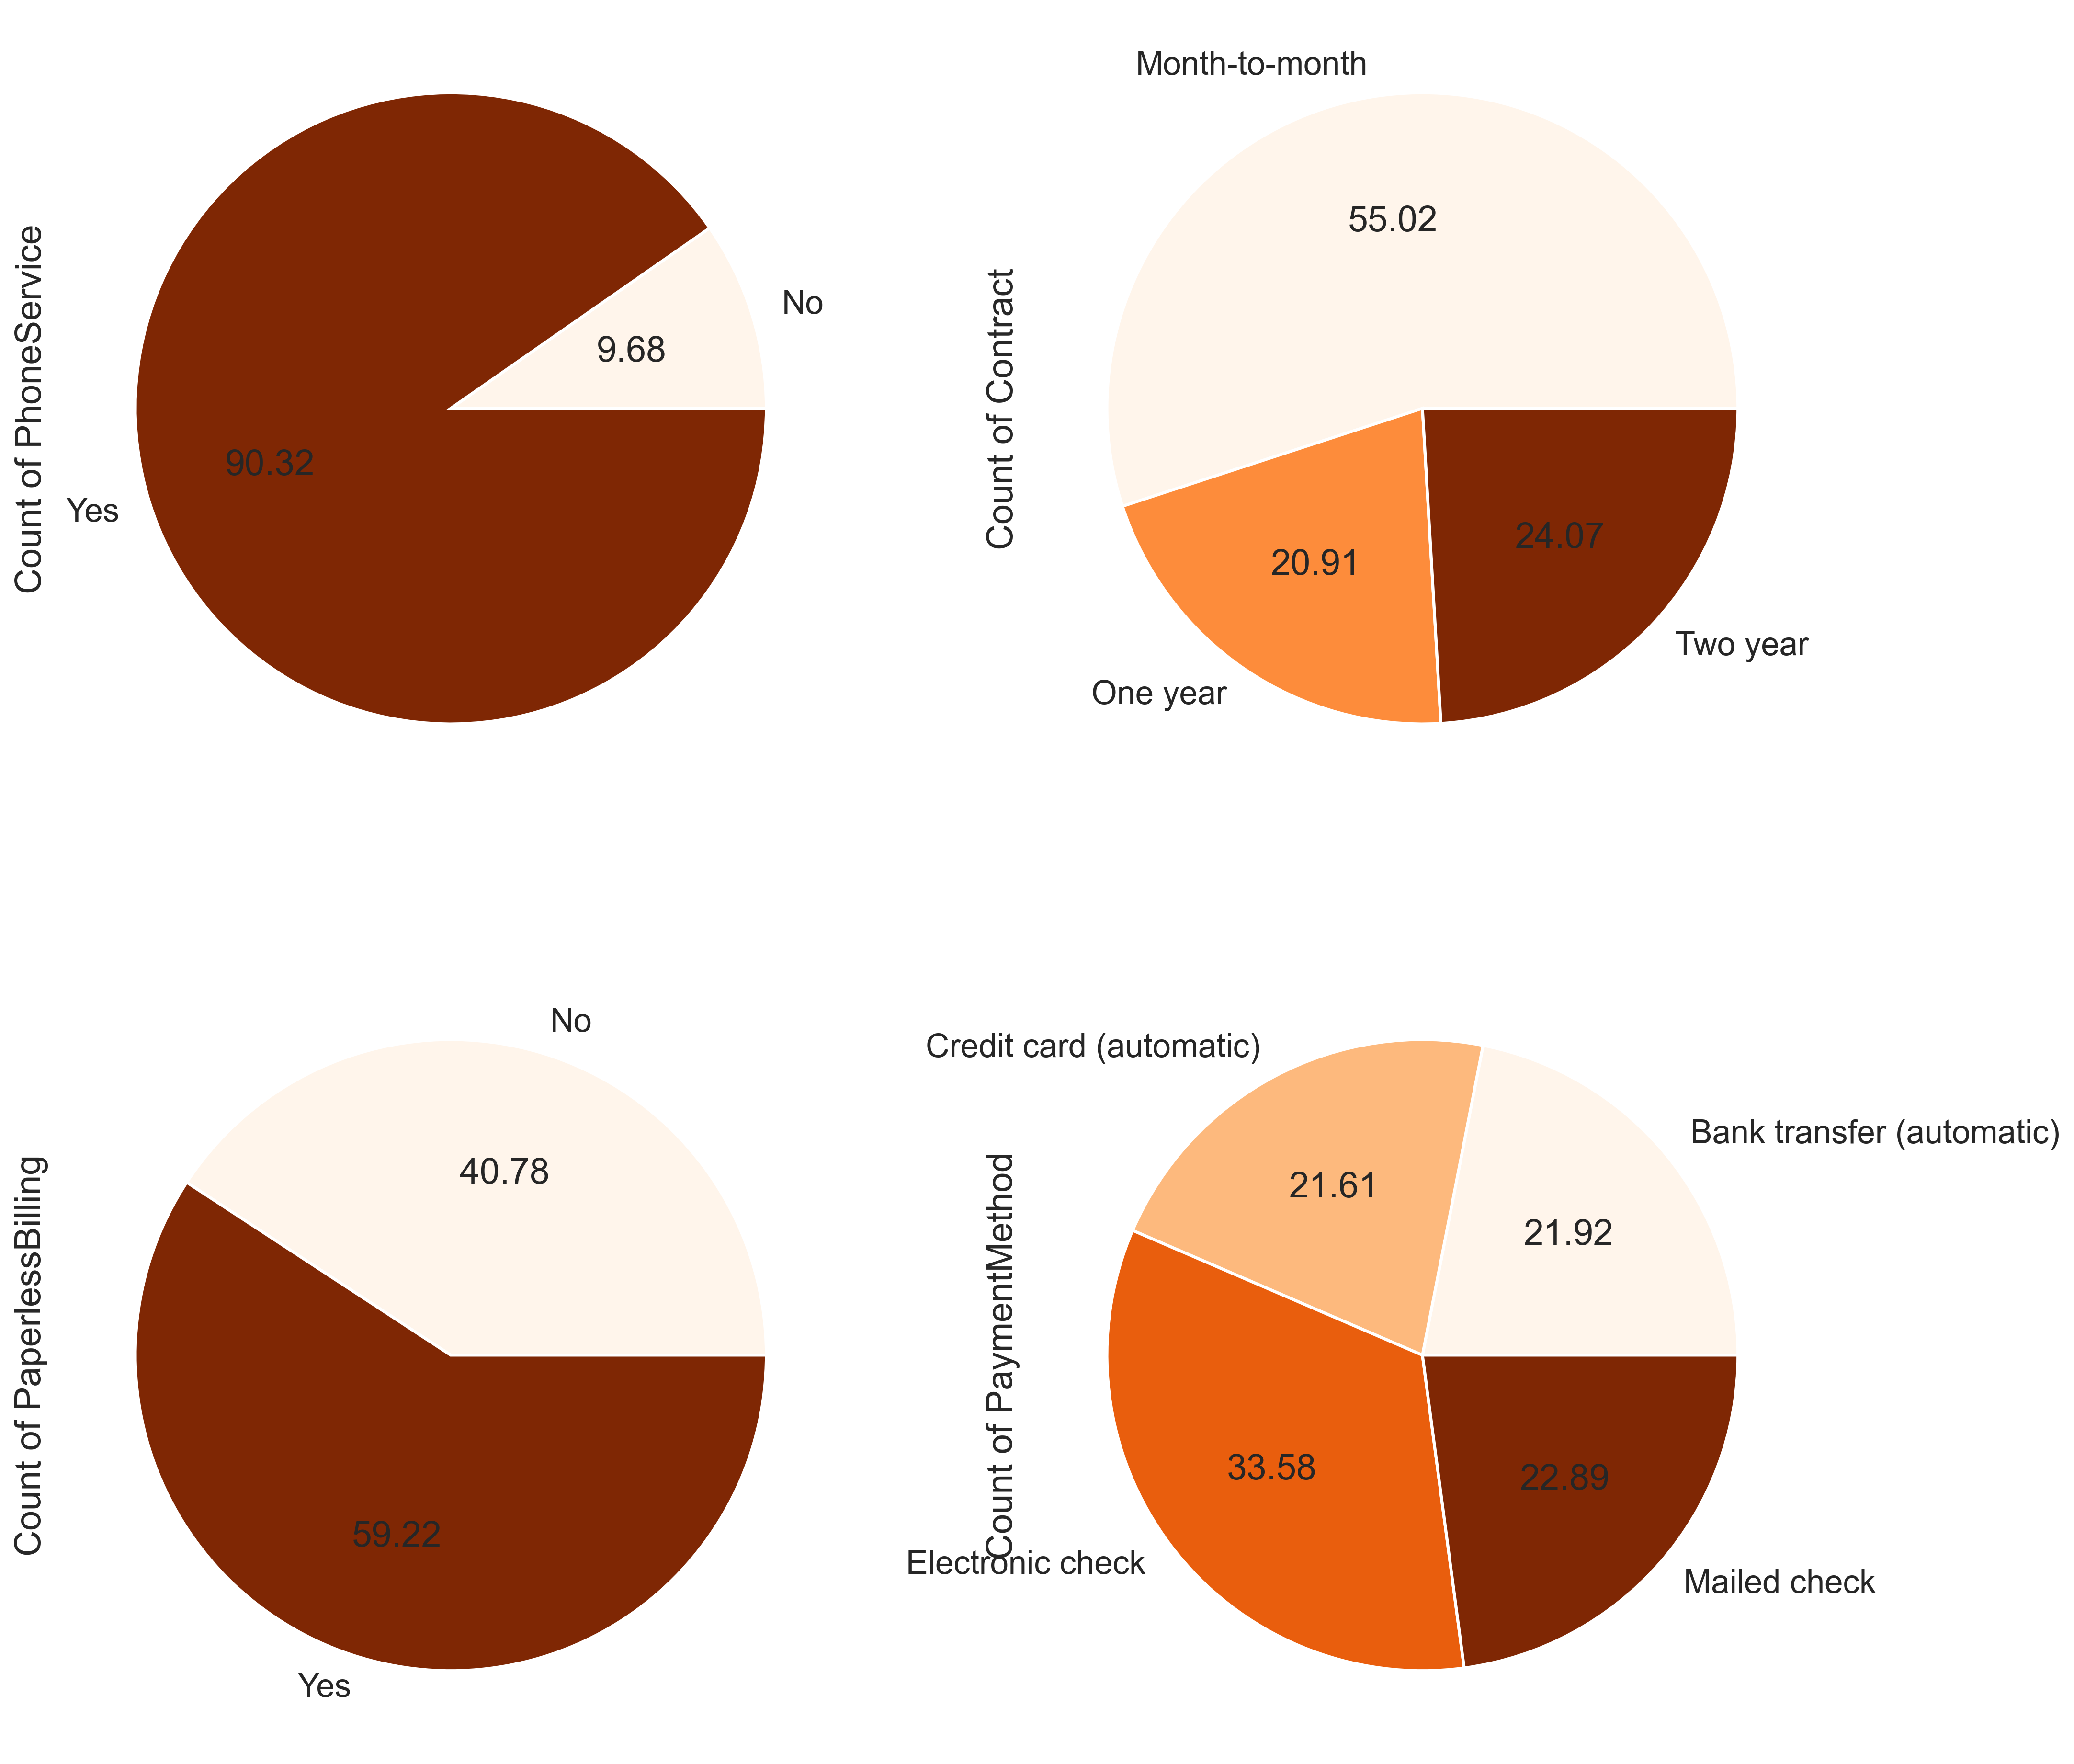

In [11]:
fig, axs = plt.subplots(2,2,figsize=(16,16))
class_series1 = df.groupby("PhoneService").size()
class_series2 = df.groupby("Contract").size()
class_series3 = df.groupby("PaperlessBilling").size()
class_series4 = df.groupby("PaymentMethod").size()
class_series1.names = "PhoneService"
class_series2.names = "Contract"
class_series3.names = "PaperlessBilling"
class_series4.names = "PaymentMethod"
class_series1.plot.pie(autopct="%.2f",cmap="Oranges", ax=axs[0,0])
axs[0,0].set_ylabel("Count of PhoneService")
class_series2.plot.pie(autopct="%.2f",cmap="Oranges", ax=axs[0,1])
axs[0,1].set_ylabel("Count of Contract")
class_series3.plot.pie(autopct="%.2f",cmap="Oranges", ax=axs[1,0])
axs[1,0].set_ylabel("Count of PaperlessBilling")
class_series4.plot.pie(autopct="%.2f",cmap="Oranges", ax=axs[1,1])
axs[1,1].set_ylabel("Count of PaymentMethod")
plt.show()

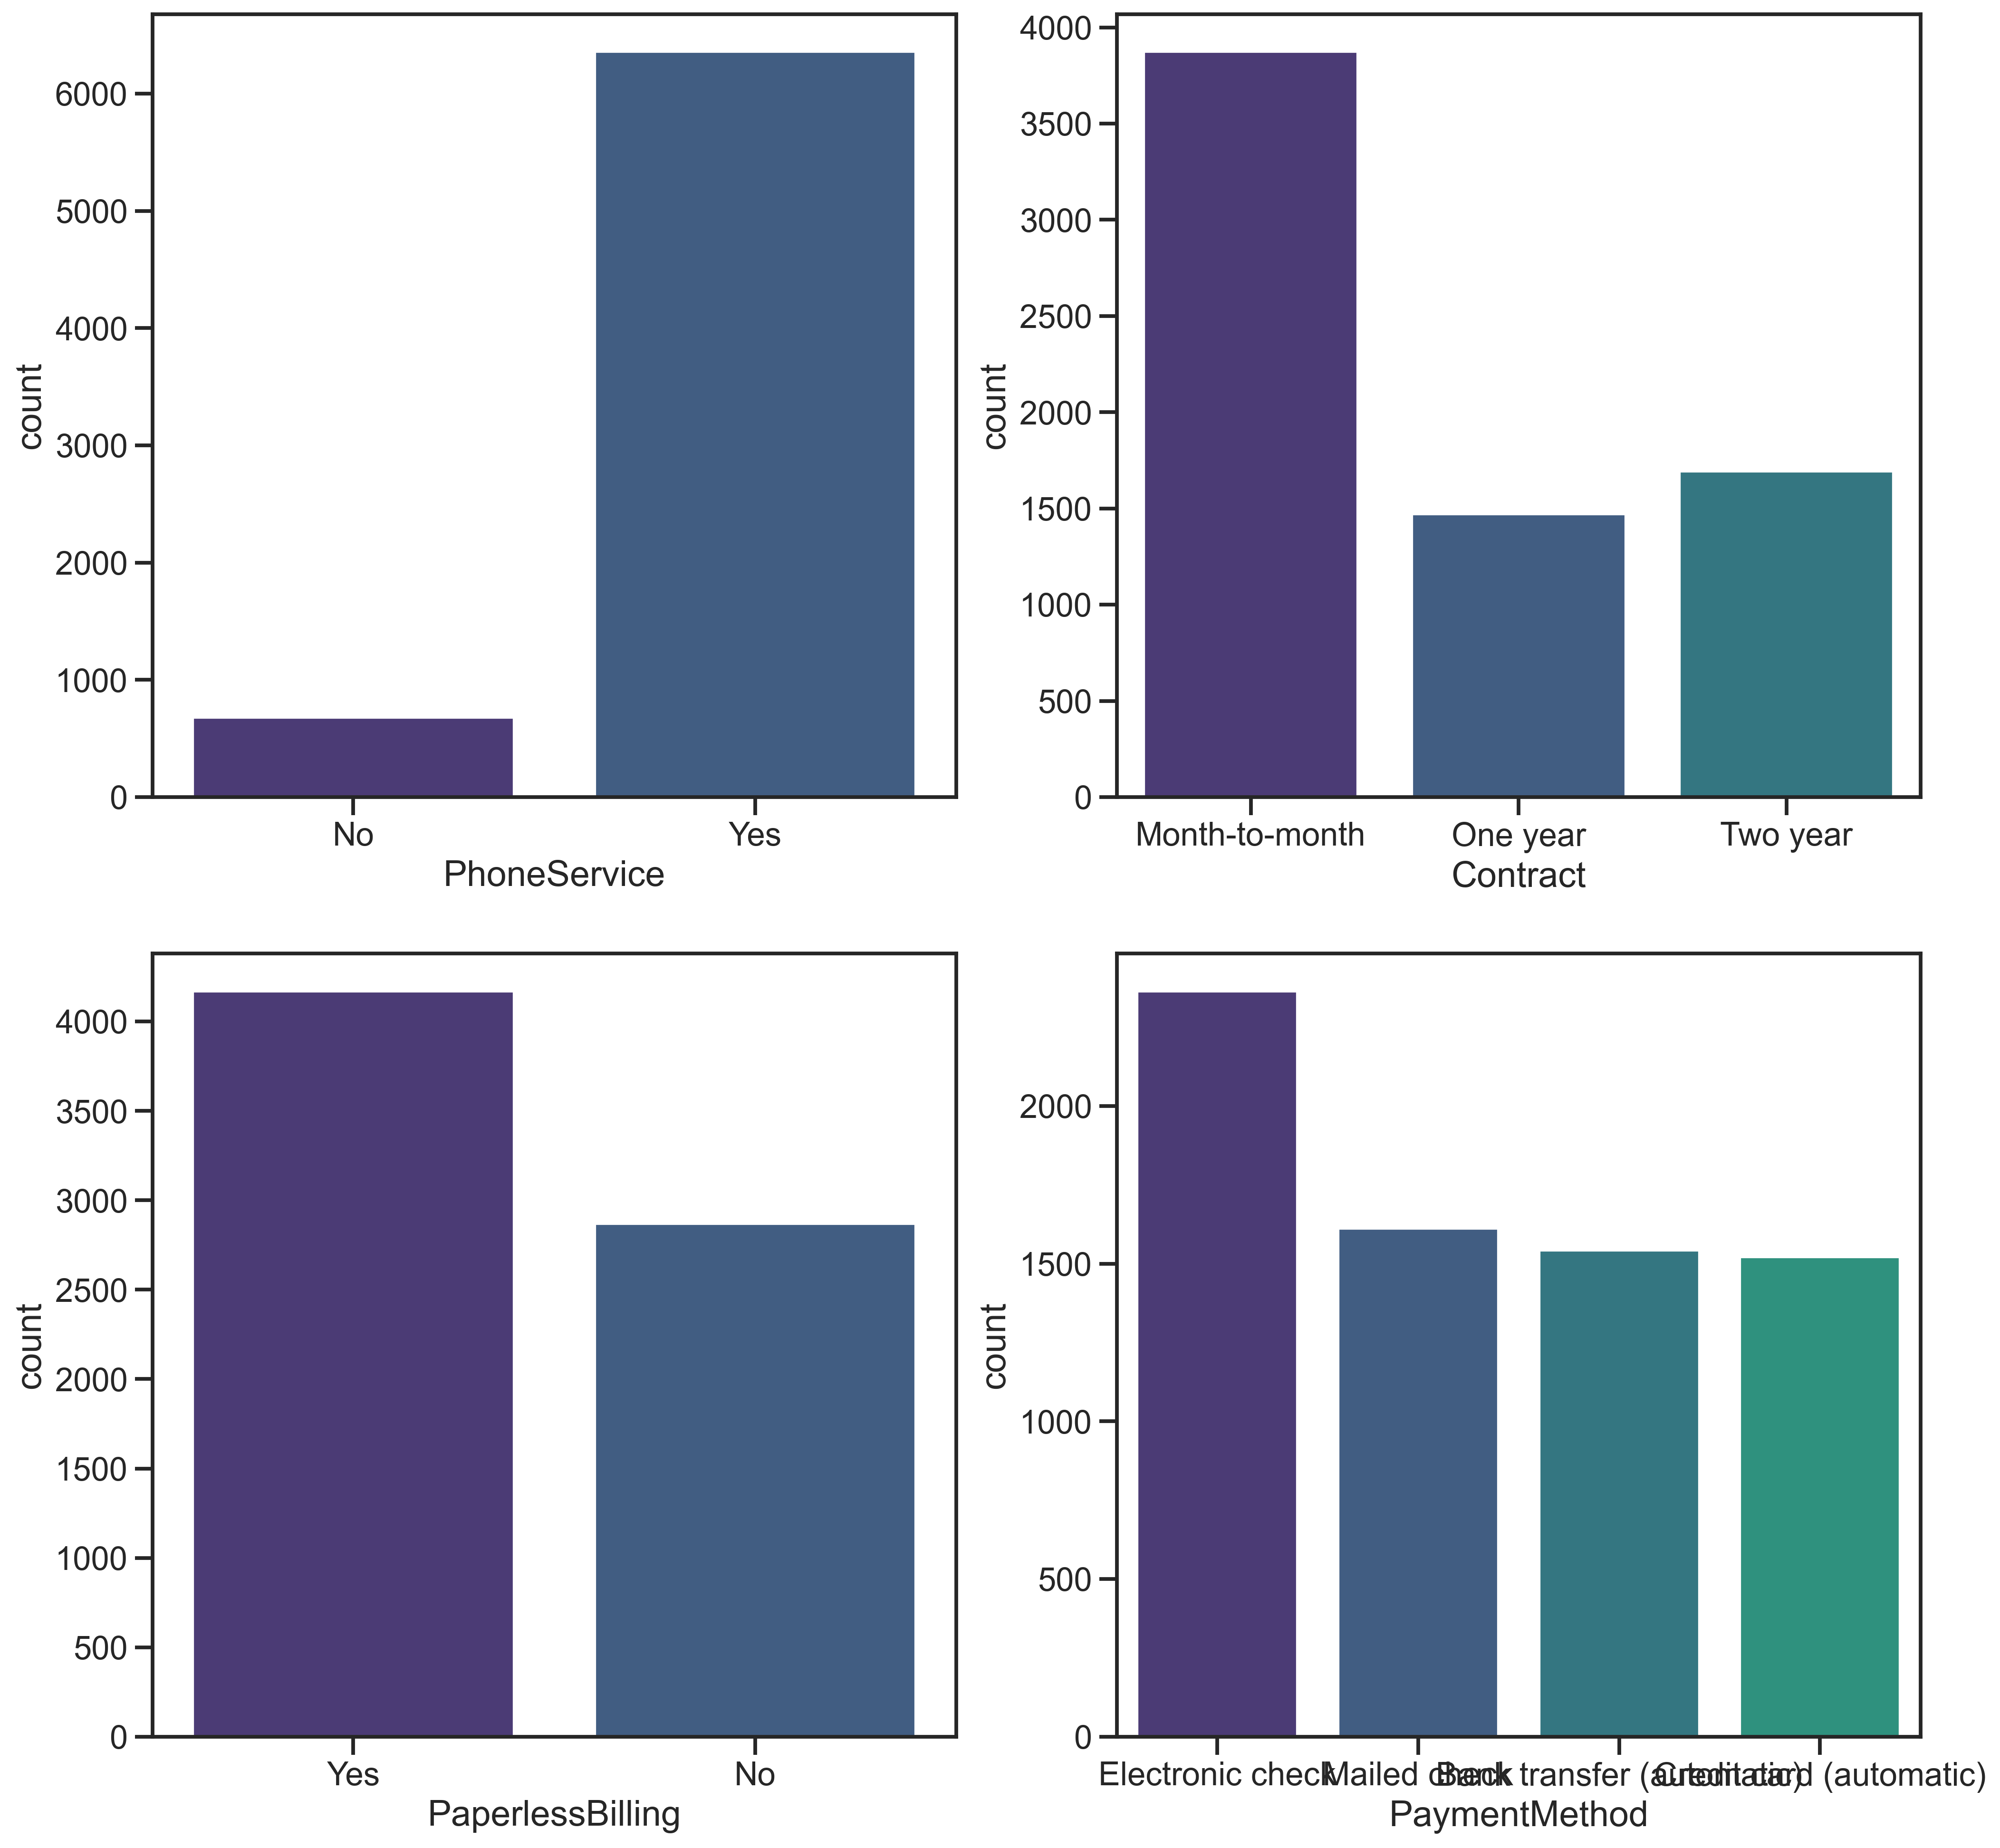

In [12]:
fig, axs = plt.subplots(2,2,figsize=(16,16))
sns.countplot(df["PhoneService"],ax=axs[0,0])
sns.countplot(df["Contract"],ax=axs[0,1])
sns.countplot(df["PaperlessBilling"],ax=axs[1,0])
sns.countplot(df["PaymentMethod"],ax=axs[1,1])
plt.show()

In [13]:
df["PhoneService"] = pd.get_dummies(df["PhoneService"],drop_first=True)
df["Contract"] = pd.get_dummies(df["Contract"],drop_first=True)
df["PaperlessBilling"] = pd.get_dummies(df["PaperlessBilling"],drop_first=True)
df["PaymentMethod"] = pd.get_dummies(df["PaymentMethod"],drop_first=True)
df["Churn"] = pd.get_dummies(df["Churn"],drop_first=True)

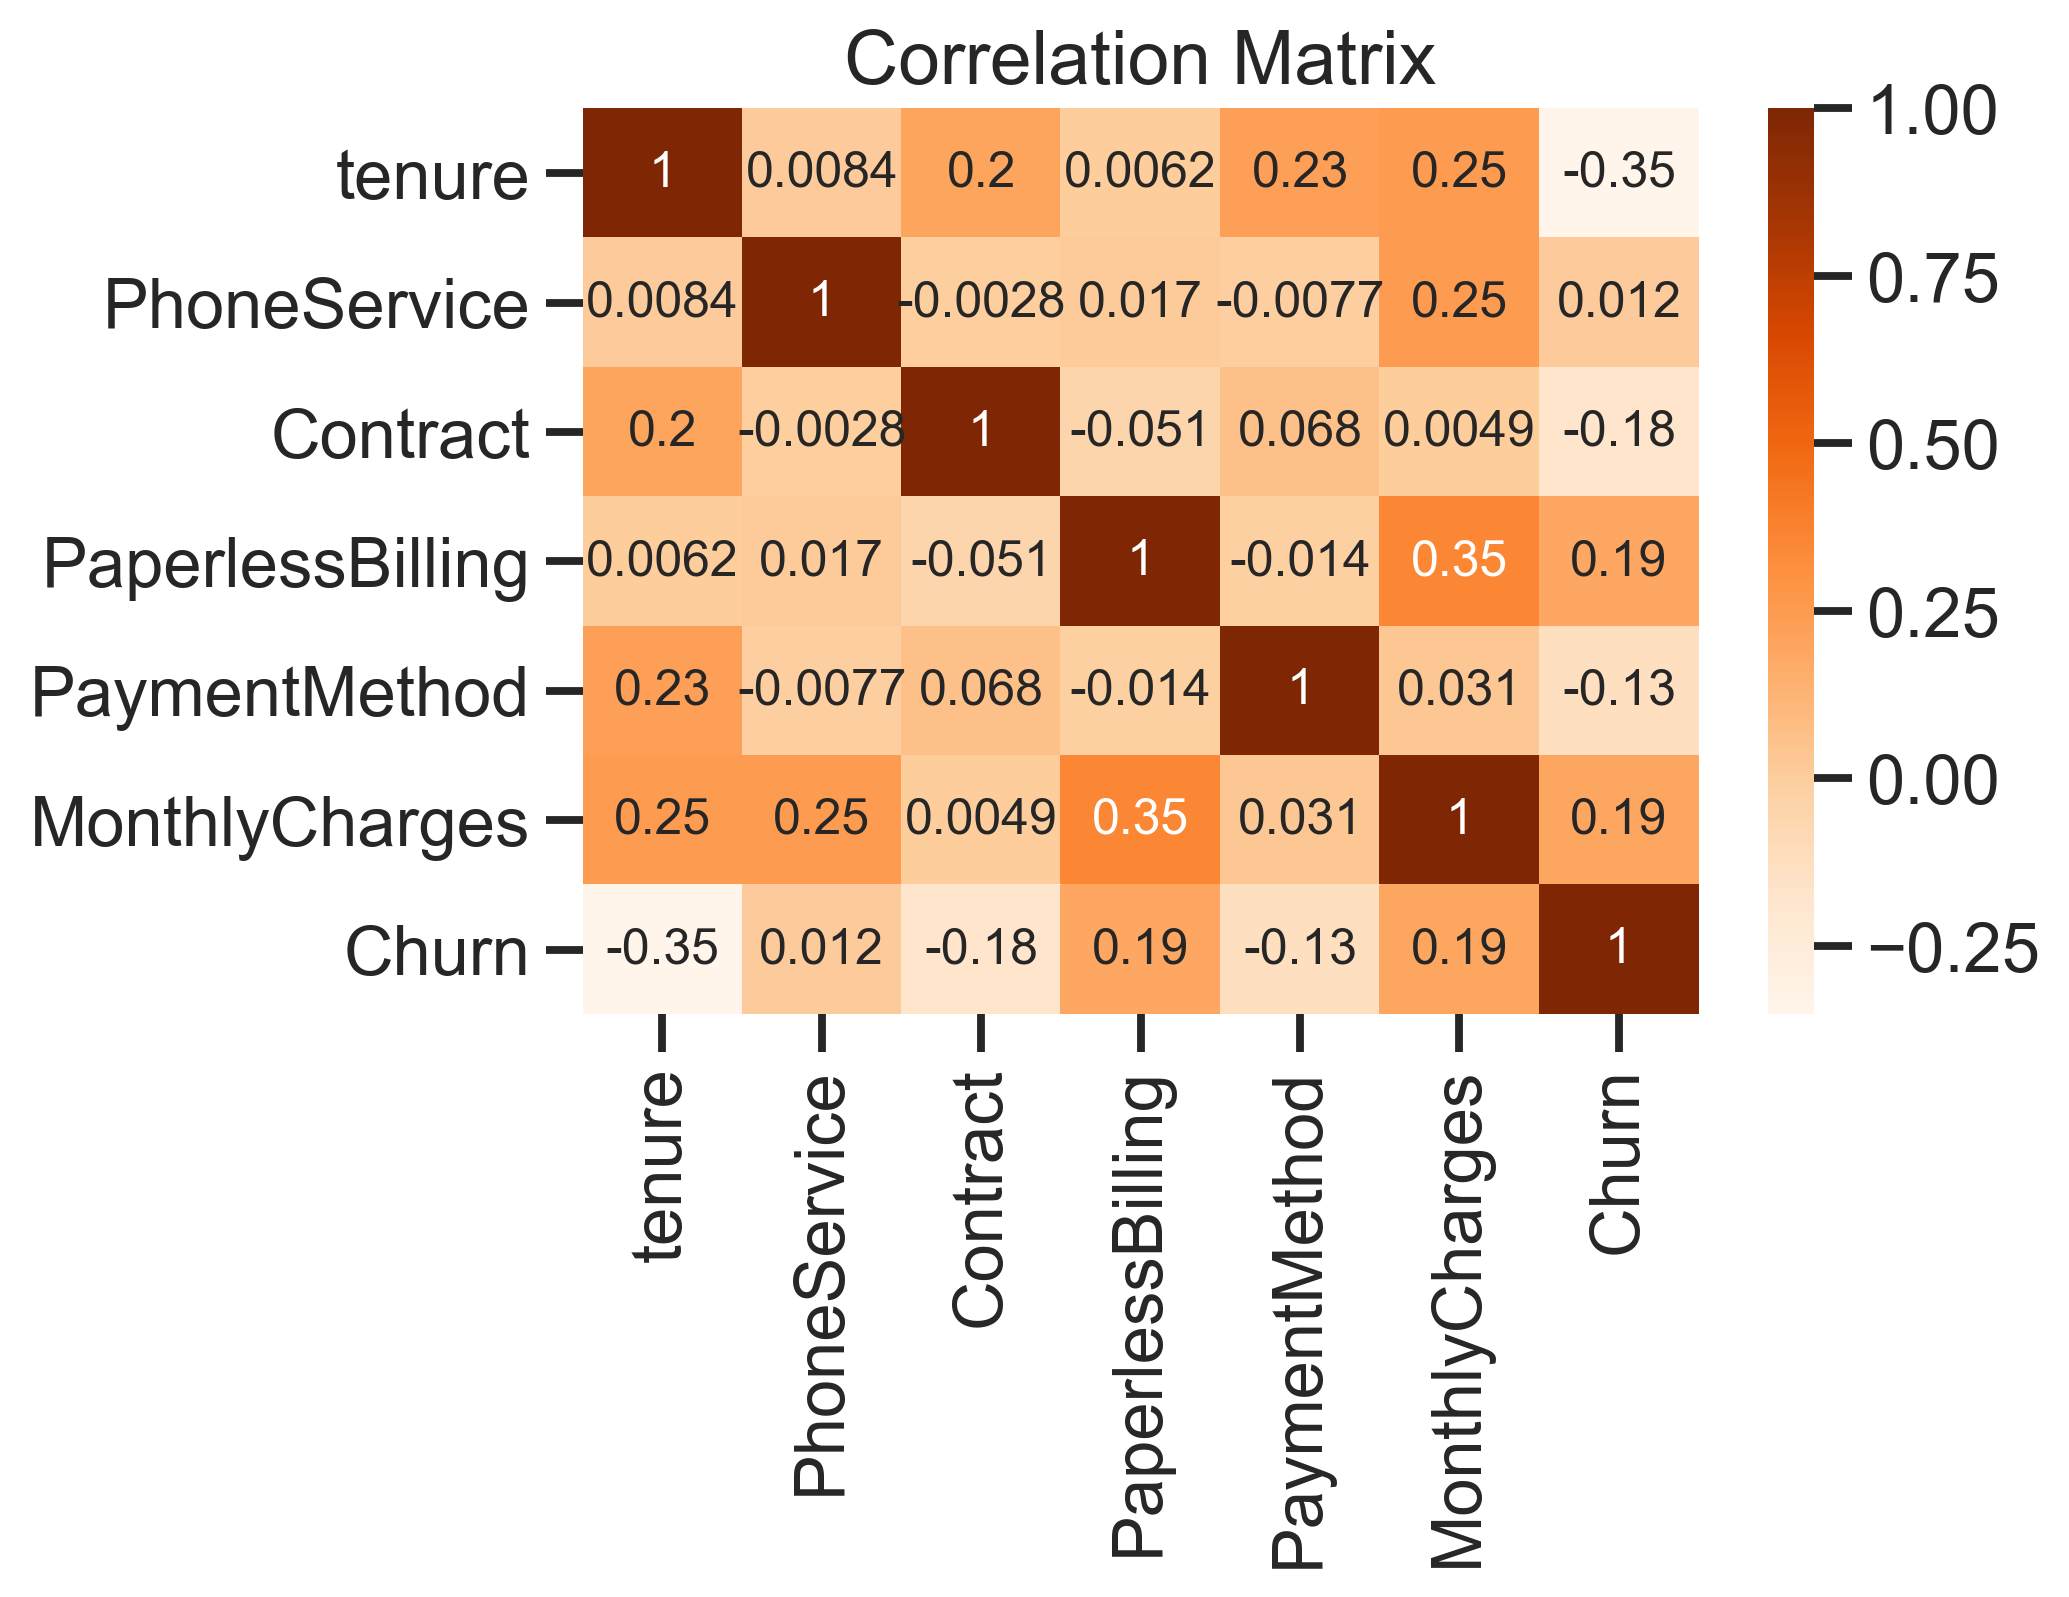

In [14]:
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True, annot_kws={"size":12},cmap="Oranges")
plt.title("Correlation Matrix")
plt.show()

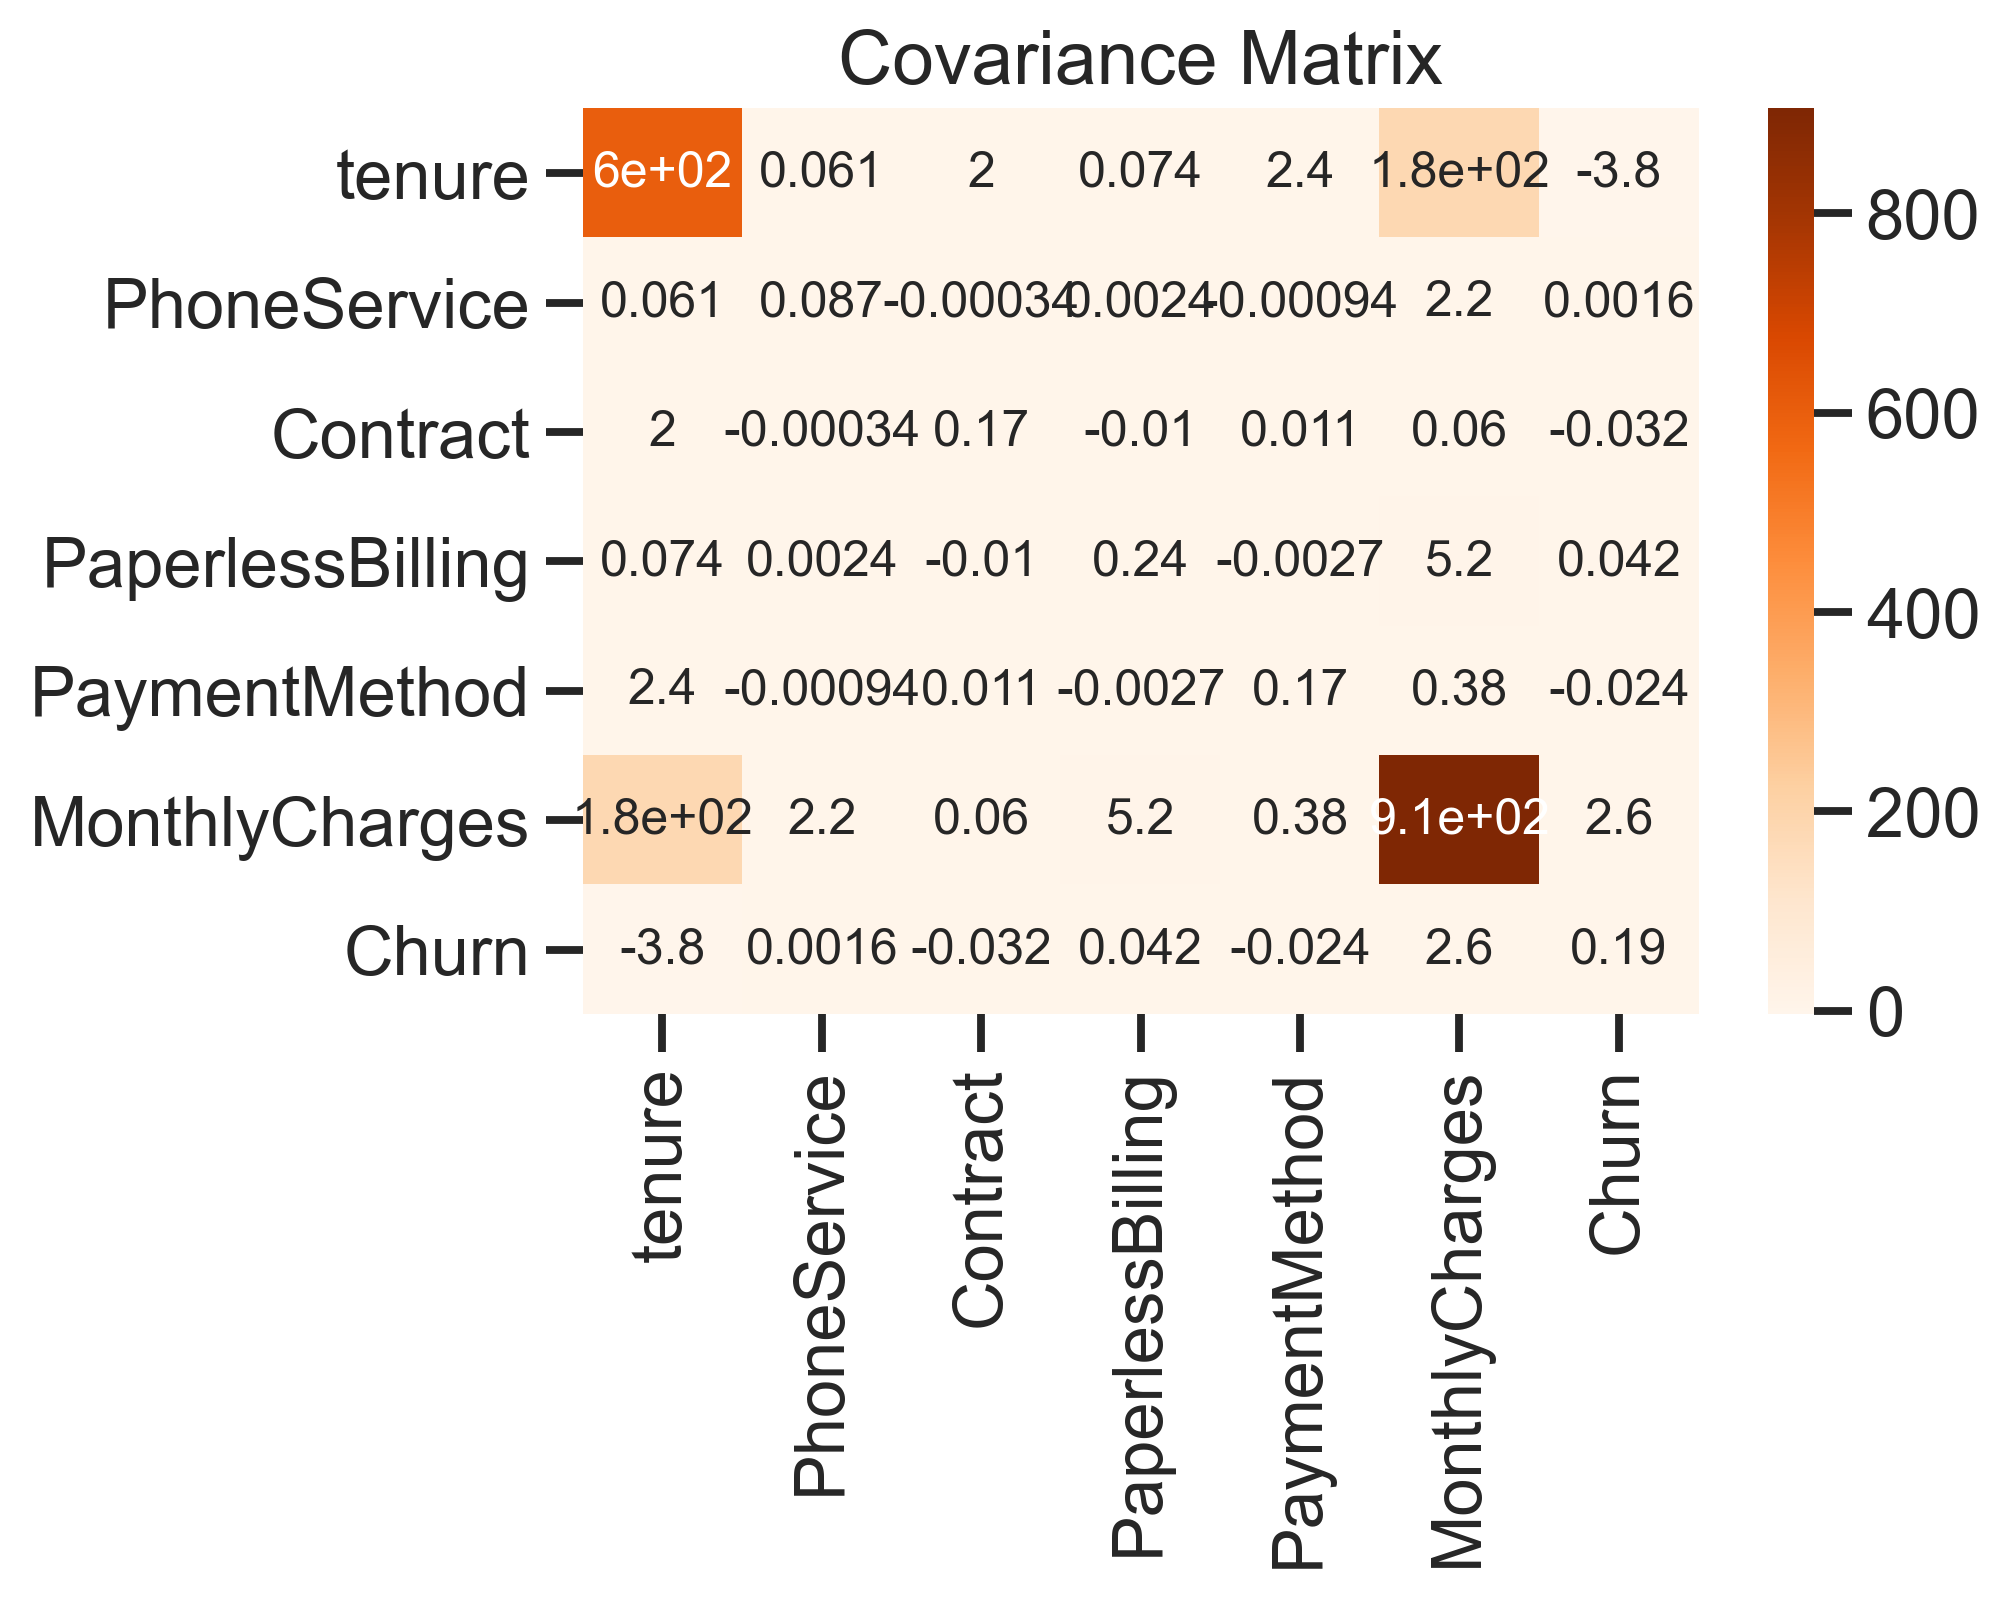

In [15]:
dfcov = df.cov()
sns.heatmap(dfcov, annot=True, annot_kws={"size":12},cmap="Oranges")
plt.title("Covariance Matrix")
plt.show()

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
Contract,7043.0,0.209144,0.406726,0.00,0.0,0.00,0.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.0,1.00,1.00,1.00
PaymentMethod,7043.0,0.216101,0.411613,0.00,0.0,0.00,0.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
Churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00


In [17]:
x = df[["tenure","PhoneService","Contract","PaperlessBilling","PaymentMethod","MonthlyCharges"]]
y = df.iloc[::,-1]

In [18]:
x_constant = sm.add_constant(x)

In [19]:
model = sm.Logit(y,x_constant).fit()
model.predict(x_constant)
model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7036
Method:                           MLE   Df Model:                            6
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                     inf
Time:                        12:32:50   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3051      0.115    -11.358      0.000      -1.530      -1.080
tenure              -0.0516      0.002    -28.939      0.000      -0.055      -0.048
PhoneService        -0.8910      0.115     -7.771      0.000      -1.116      -0.666
Contract            -0.5563      0.097     -5.748      0.000      -0.746      -0.367
PaperlessBilling     0.5567      0.071      7.857      0.000       0.418       0.696
PaymentMethod       -0.3711      0.088     -4.209      0.000      -0.544      -0.198
MonthlyCharges       0.0331      0.002     21.741      0.000       0.030       0.036
====================================================================================
"""

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.8,random_state=0)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = scaler.transform(x_train)

In [24]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(x_test)
pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

,Actual,Predicted
2200,0,1
4627,0,1
3225,0,1
2828,0,1
3768,0,1
...,...,...
5502,1,1
3436,0,0
4256,0,0
6810,1,1


In [26]:
classificationreport = pd.DataFrame(metrics.classification_report(y_test,y_pred,output_dict=True)).transpose()
classificationreport

,precision,recall,f1-score,support
0,0.954175,0.369650,0.532866,4112.000000
1,0.358733,0.952068,0.521114,1523.000000
accuracy,0.527063,0.527063,0.527063,0.527063
macro avg,0.656454,0.660859,0.526990,5635.000000
weighted avg,0.793242,0.527063,0.529690,5635.000000


In [29]:
cmat = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), columns = ("Predicted: No "," Predicted: Yes"), index=[" Actual: No"," Actual: Yes"])
cmat

,Predicted: No,Predicted: Yes
Actual: No,1520,2592
Actual: Yes,73,1450


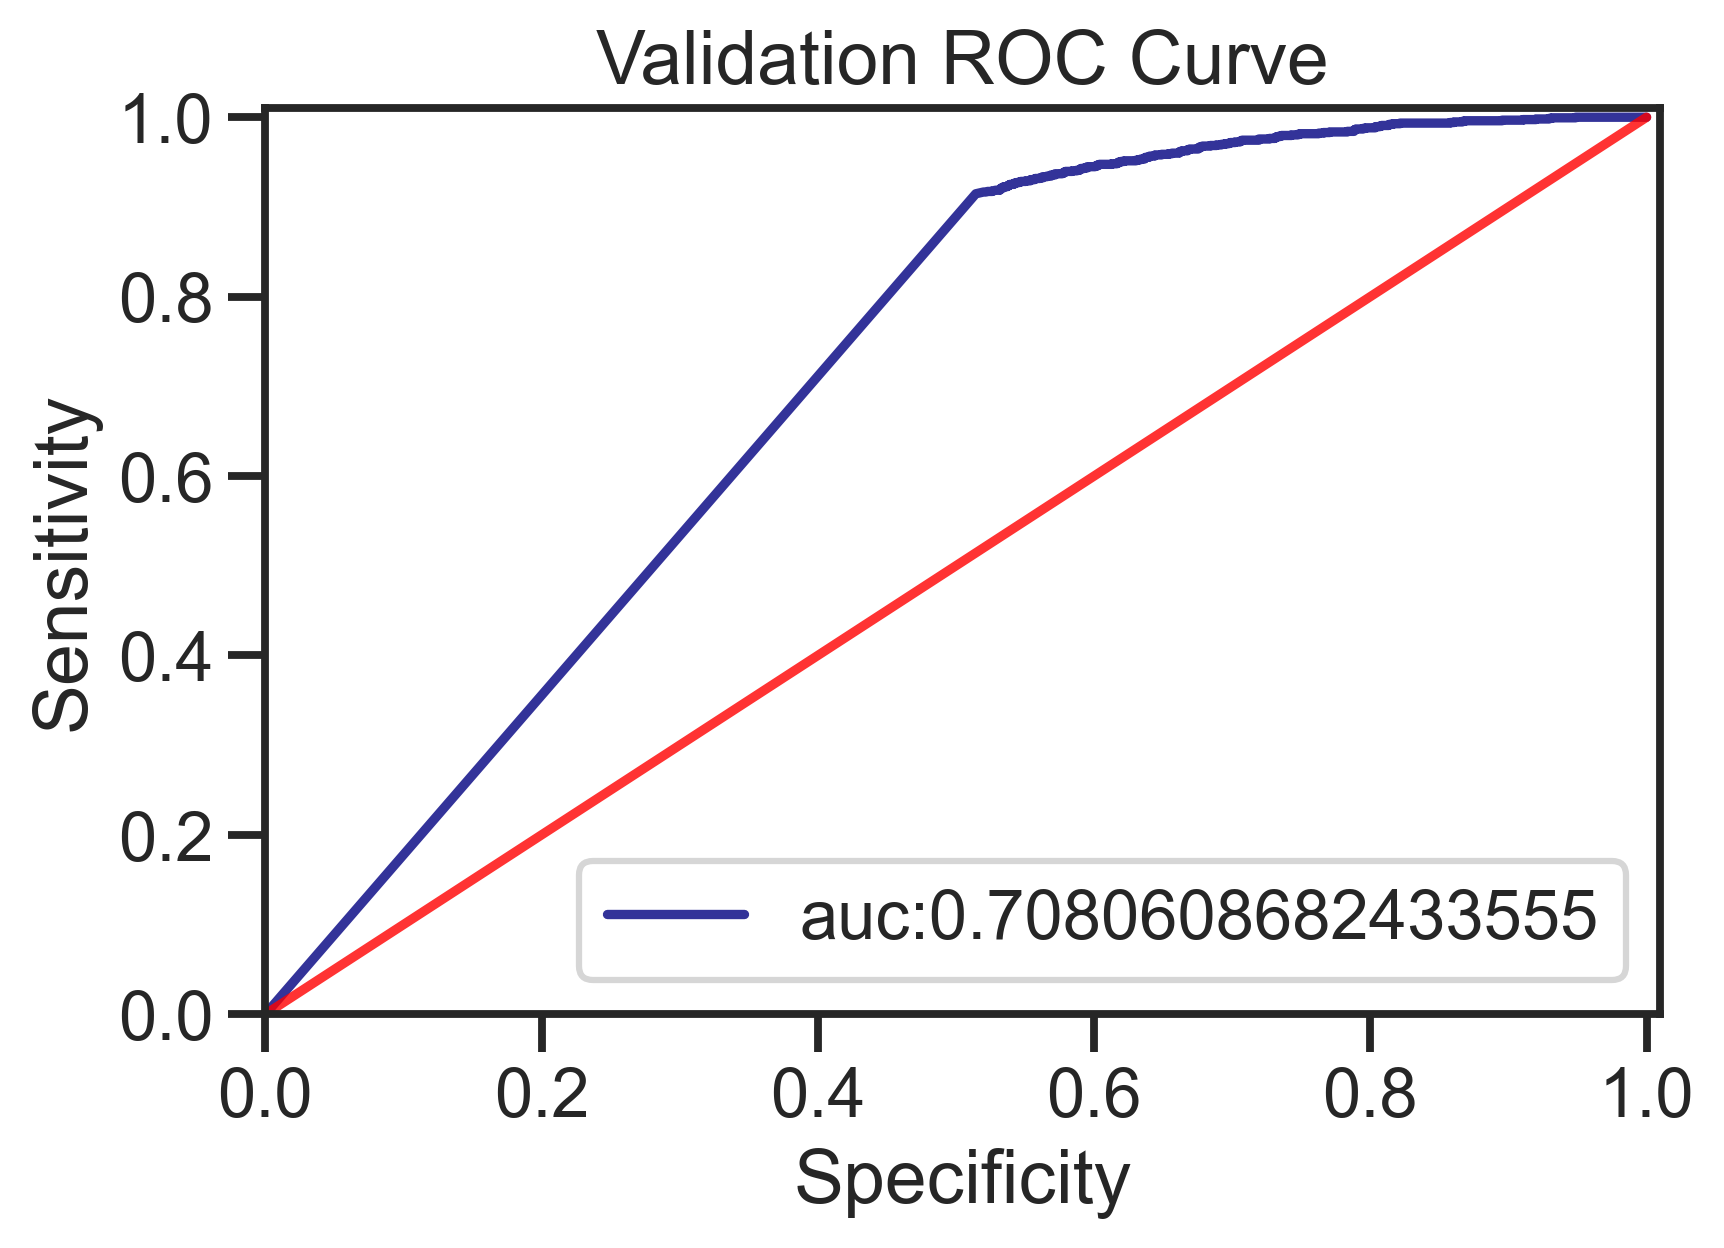

In [31]:
y_predlogreg_proba = logreg.predict_proba(x_test)[::,1]
fprlogreg, tprlogreg, _ = metrics.roc_curve(y_test,y_predlogreg_proba)
auclogreg = metrics.roc_auc_score(y_test,y_predlogreg_proba)
plt.plot(fprlogreg, tprlogreg,label="auc:" +str(auclogreg), color = "navy",alpha=0.8)
plt.plot([0,1],[0,1],color="red",alpha=0.8)
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()


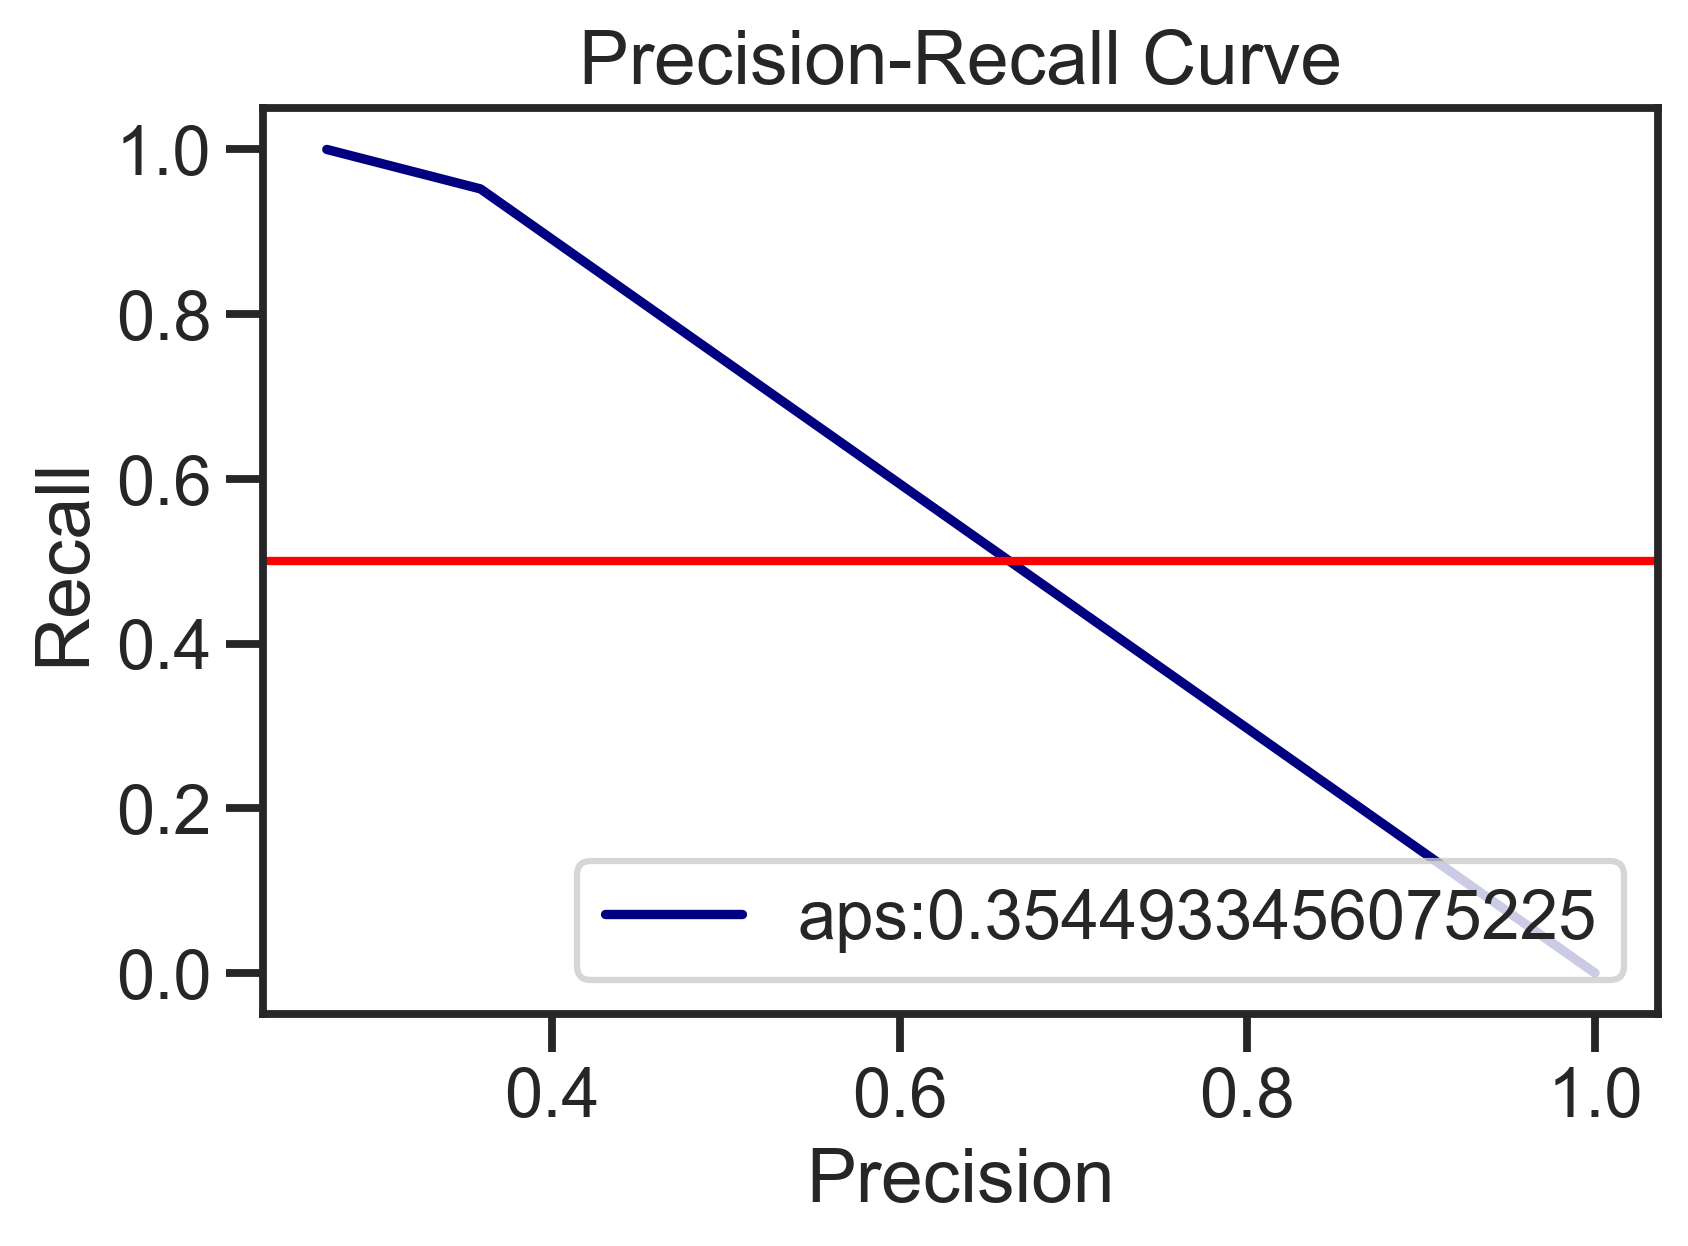

In [36]:
precisionrecalllogreg,recalllogreg,thresholdlogreg = metrics.precision_recall_curve(y_test,y_pred)
apslogreg = metrics.average_precision_score(y_test,y_pred)
plt.plot(precisionrecalllogreg,recalllogreg, label = "aps:" + str(apslogreg), color="navy")
plt.title("Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.axhline(y=0.5, color="red", lw=2)
plt.show()

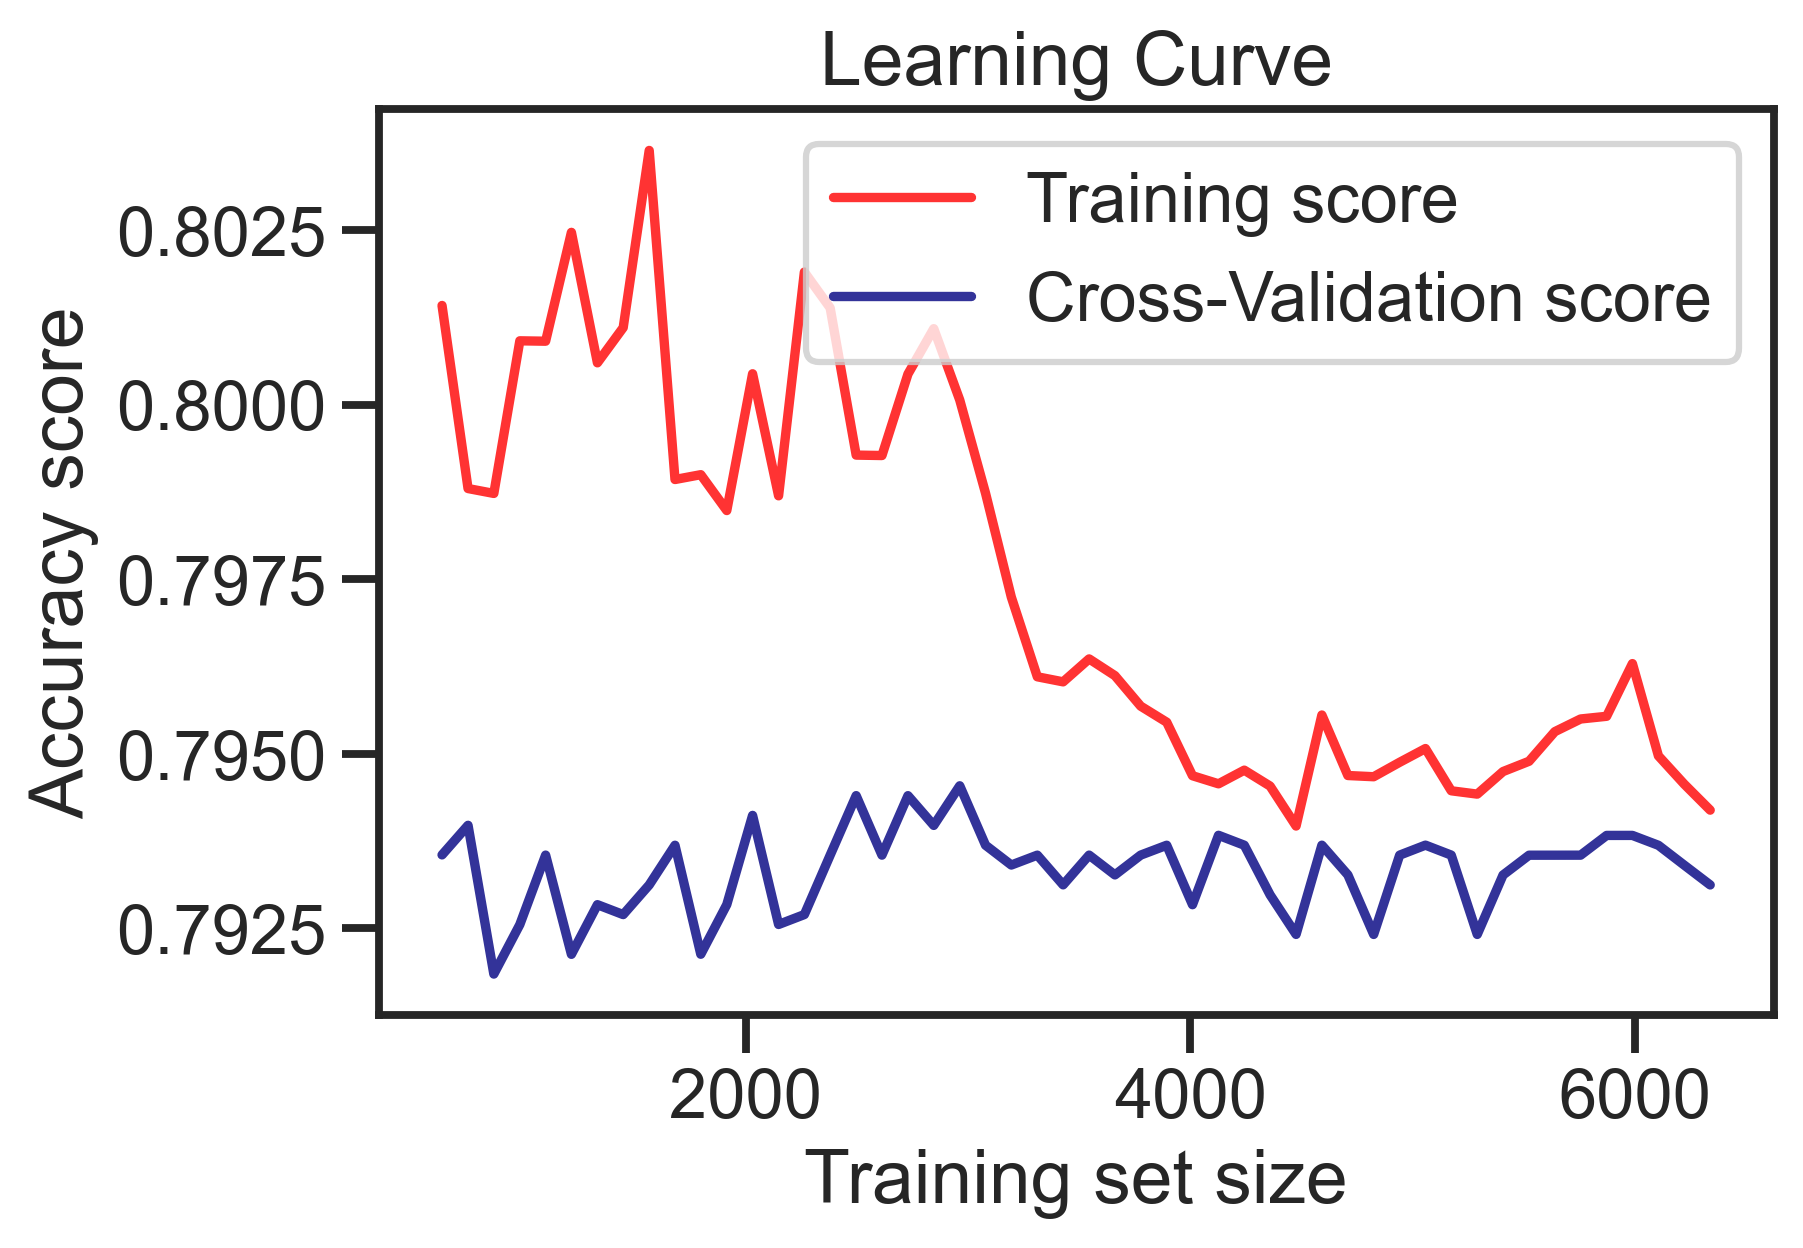

In [37]:
trainsizelogreg, trainscorelogreg, testscorelogreg = learning_curve(LogisticRegression(),x,y,cv=10,n_jobs=-1, train_sizes=np.linspace(0.1,1.0,50))
trainscorelogreg_mean = np.mean(trainscorelogreg,axis=1)
trainscorelogreg_std = np.std(trainscorelogreg,axis=1)
testscorelogreg_mean = np.mean(testscorelogreg,axis=1)
testscorelogreg_std = np.std(testscorelogreg,axis=1)
plt.plot(trainsizelogreg,trainscorelogreg_mean,color="red",alpha=0.8,label="Training score")
plt.plot(trainsizelogreg,testscorelogreg_mean,color="navy",alpha=0.8,label="Cross-Validation score")
plt.title("Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc=1)
plt.show()